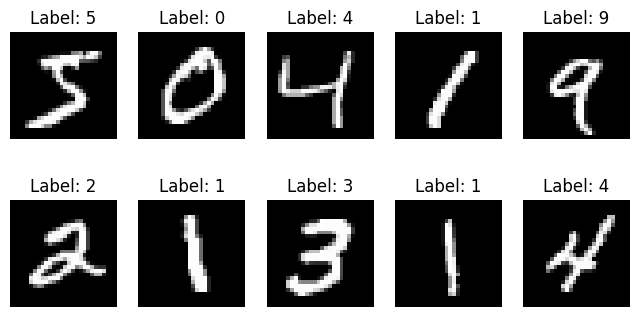

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# 1. Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2. Display some sample images with labels
plt.figure(figsize=(8, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

# 3. Preprocess data (reshape + normalize)
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

In [ ]:
# 4. One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
# 3. Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# 4. Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 5. Train the model
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

# 6. Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 42s 47ms/step - accuracy: 0.8683 - loss: 0.4433 - val_accuracy: 0.9828 - val_loss: 0.0654
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 43s 49ms/step - accuracy: 0.9816 - loss: 0.0629 - val_accuracy: 0.9888 - val_loss: 0.0428
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 79s 46ms/step - accuracy: 0.9870 - loss: 0.0432 - val_accuracy: 0.9882 - val_loss: 0.0436
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 39s 46ms/step - accuracy: 0.9908 - loss: 0.0288 - val_accuracy: 0.9908 - val_loss: 0.0371
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 46ms/step - accuracy: 0.9930 - loss: 0.0214 - val_accuracy: 0.9915 - val_loss: 0.0307
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9878 - loss: 0.0354
Test accuracy: 0.9906


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


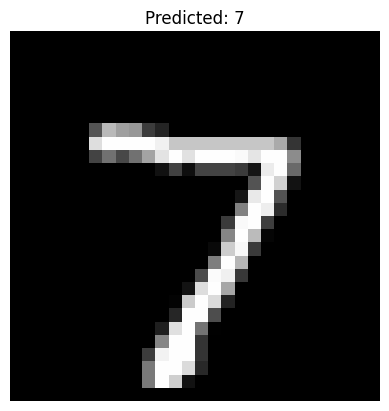

In [ ]:
# Pick a sample image from the test set
sample_index = 0  # change this to try different samples
sample_image = x_test[sample_index]
sample_label = y_test[sample_index]

# Predict (model expects batch dimension)
prediction = model.predict(np.expand_dims(sample_image, axis=0))

# Convert prediction from one-hot to class index
predicted_class = np.argmax(prediction) # np.argmax gets the class with highest probability

# Display the image and prediction
plt.imshow(sample_image.reshape(28, 28), cmap='gray')
plt.title(f'Predicted: {predicted_class}')
plt.axis('off')
plt.show()